## Context
E-News Express is an online news portal which is aiming to expand its business by acquiring new subscribers.The design team has created a new landing page that has a new outline & more relevant content compared to the old page.Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups and they have given a dataset that contains user ID, the time spent on each webpage , whether the user gets converted or not, what is the landing page, language chosen by the user to view landing page.The aim is to explore the data and perform a statistical analysis to determine the effectiveness of the new landing page in gathering new subscribers.


## Data Description:

The detailed data dictionary is given below:

* user_id - Unique user ID of the person visiting the website
* group - Whether the user belongs to the first group (control) or the second group (treatment)
* landing_page - Whether the landing page is new or old
* time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
* converted - Whether the user gets converted to a subscriber of the news portal or not
* language_preferred - Language chosen by the user to view the landing page

## Questions to be answered using given dataset are as follows:
1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

### Sanity Checks

**Importing necessary libraries**

In [115]:
#Import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

**Importing the dataset**

In [116]:
#read given dataset file 
data = pd.read_csv('abtest.csv')

**View first and last 5 rows of the dataset**

In [117]:
#Show first 5 rows of the dataset
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [118]:
#Show last 5 rows of the dataset
data.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


**Understand the shape of the dataset**

In [119]:
#Rows and columns of the dataset
data.shape
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 100 rows and 6 columns.


**Check the data types of the columns for the dataset**

In [120]:
#check the columns, datatypes of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* There are 2 numerical columns and 4 object type columns
* group, landing_page, converted and language_preferred columns are object type variables
* time_spent_on_the_page is a float type variable
* user_id is a int type variable

**Understand what values are there for each object type**

In [121]:
#find unique values for group column
data['group'].unique()

array(['control', 'treatment'], dtype=object)

In [122]:
#find unique values for landing_page column
data['landing_page'].unique()

array(['old', 'new'], dtype=object)

In [123]:
#find unique values for converted column
data['converted'].unique()

array(['no', 'yes'], dtype=object)

In [124]:
#find unique values for language_preferred column
data['language_preferred'].unique()

array(['Spanish', 'English', 'French'], dtype=object)

**Check if there are missing values**

In [125]:
#check if any values are missing
data.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

* There is no missing data

**Check for any duplicate entries**

In [126]:
#check if any duplicates are there
data.duplicated().sum()

0

* There are no duplicate entries in  the data

**Checking the statistical summary of the data** 

In [127]:
#Describe the numerical columns
data.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


**Summary**
* user_id: There are 100 users,  average userid is 546517, Smallest userid is 546443 and largest userid is 546592.
* time_spent_on_the_page: The average time spent on the page is approximately 5.377 minutes, The minimum time spent is 0.19 minutes and the maximum time spent is 10.71 minutes
* The data suggests a typical range of user engagement with the page, with most users spending between about 3.88 and 7.0225 minutes.

**Let's check the count and percentage of categorical levels in each column**

In [168]:
#describe the data that has datatype object
data.describe(include='object')

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


In [129]:
# Making a list of all categorical variables
cat_cols =  ['group', 'landing_page', 'converted', 'language_preferred']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 50)

group
control      50
treatment    50
Name: count, dtype: int64
--------------------------------------------------
landing_page
old    50
new    50
Name: count, dtype: int64
--------------------------------------------------
converted
yes    54
no     46
Name: count, dtype: int64
--------------------------------------------------
language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64
--------------------------------------------------


**Summary**
* group: 2 unique values - 'control' with 50 values and 'treatment' with 50 values
* landing_page: 2 unique values - 'old' with 50 values and 'new' with 50 values
* converted: 2 unique values - 'yes' with 54 values and 'no' with 46 values
* language_preferred: 3 unique values - 'Spanish' with 34 values, 'French' with 34 values, 'English' with 32 values

### Univariate Analysis

**Let's check the distribution for numerical columns.**

**Observations on time_spent_on_the_page**

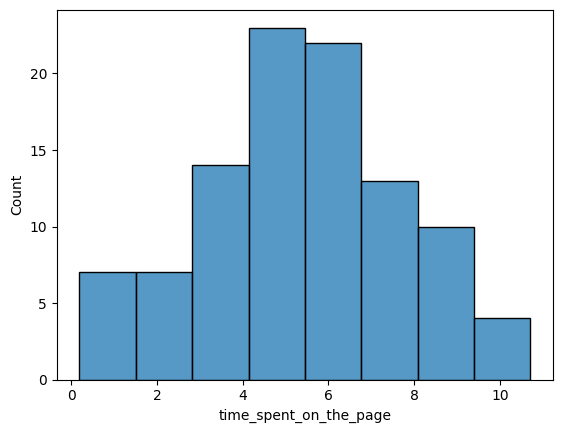

In [130]:
#Draw distribution of time_spent_on_the_page variable
sns.histplot(data=data,x='time_spent_on_the_page')
plt.show()

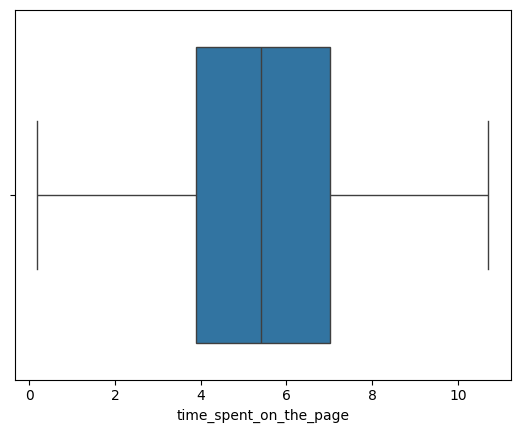

In [131]:
#Draw distribution of time_spent_on_the_page variable to see if there are any outliers
sns.boxplot(data=data,x='time_spent_on_the_page')
plt.show()

* There are no outliers for time_spent_on_the_page attribute and is normally distributed

**Observations on group**

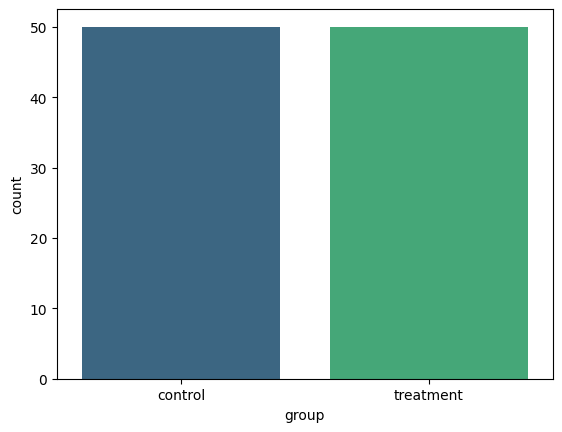

In [132]:
#Draw distribution of group variable to understand counts
sns.countplot(data=data,x='group', hue='group', palette='viridis')
plt.show()

* control and treatement groups are equally distributed in the sample

**Observations on landing_page**

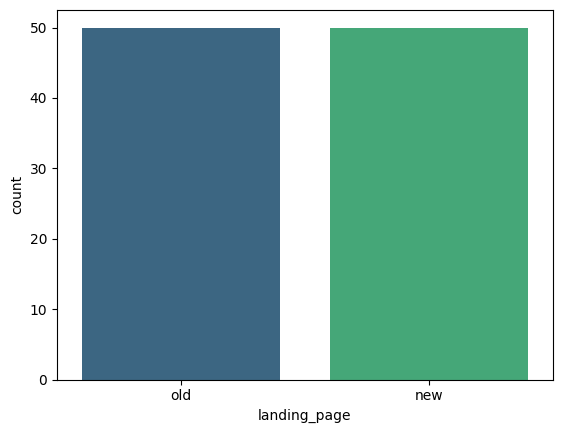

In [133]:
#Draw distribution of landing_page variable to understand counts
sns.countplot(data=data,x='landing_page', hue='landing_page', palette='viridis')
plt.show()

* old and new pages are equally distributed in the sample

**Observations on converted**

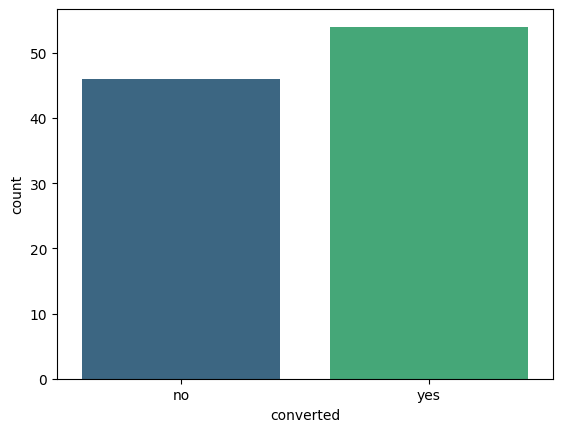

In [134]:
#Draw distribution of converted variable to understand counts
sns.countplot(data=data,x='converted', hue='converted', palette='viridis')
plt.show()

* There is increase in conversion to new page compared to old page 

**Observations on language_preferred**

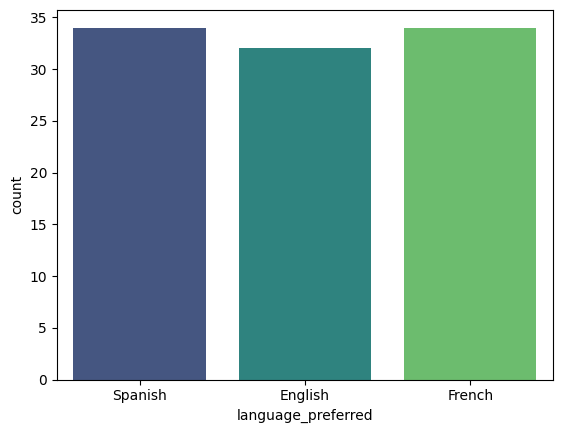

In [135]:
#Draw distribution of language_preferred variable to understand counts
# Custom palette
custom_palette = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
sns.countplot(data=data,x='language_preferred',  hue='language_preferred', palette='viridis')
plt.show()

* Spanish and French has equal entries compared to English which is slightly lower than the other two

### Bivariate Analysis

**Lets understand heatmap**

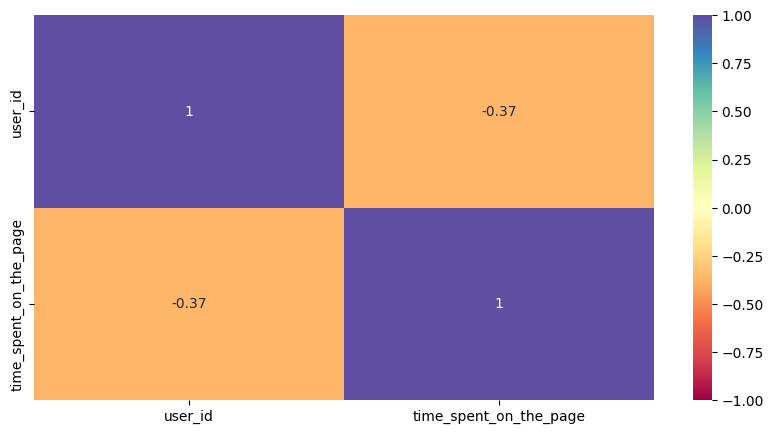

In [136]:
#As correlation can be done for only numeric columns, lets exclude non numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
numeric_data = data.drop(columns=non_numeric_columns)
plt.figure(figsize=(10,5))
#draw heatmap
sns.heatmap(numeric_data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

In [137]:
#see the correlation values in tabular format
numeric_data.corr()

,user_id,time_spent_on_the_page
user_id,1.000000,-0.372868
time_spent_on_the_page,-0.372868,1.000000


**Let's check time_spent_on_the_page w.r.to group**

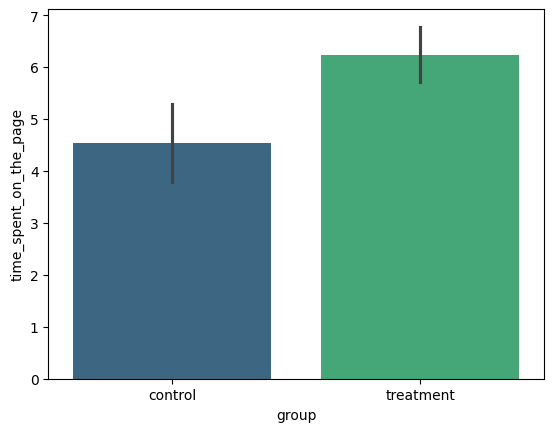

In [138]:
#Draw barplot to understand relation between group and time_spent_on_the_page
sns.barplot(data = data, x = 'group', y = 'time_spent_on_the_page', hue='group', palette='viridis')
plt.show()

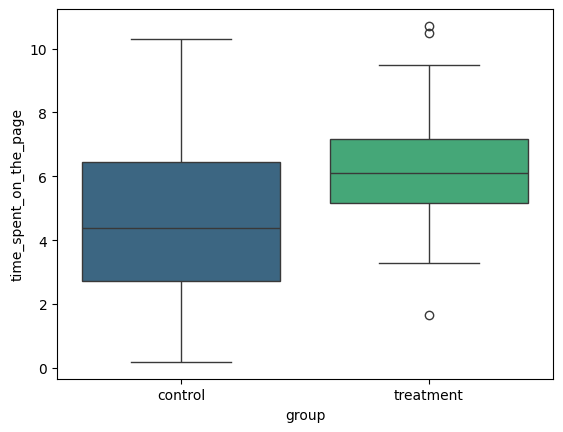

In [139]:
#Draw boxplot of group and time_spent_on_the_page variable to see if there are any outliers
sns.boxplot(data=data,x = 'group', y='time_spent_on_the_page',hue='group', palette='viridis')
plt.show()

* The plot shows treatment group are spending more time on the page compared to control group

**Let's check time_spent_on_the_page w.r.to landing_page**

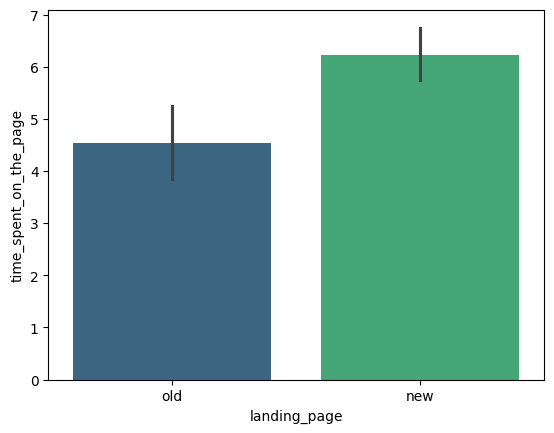

In [140]:
# Draw barplot to understand relation between landing_page and the time spent on the page
sns.barplot(data = data, x = 'landing_page', y = 'time_spent_on_the_page', hue='landing_page', palette='viridis')
plt.show()

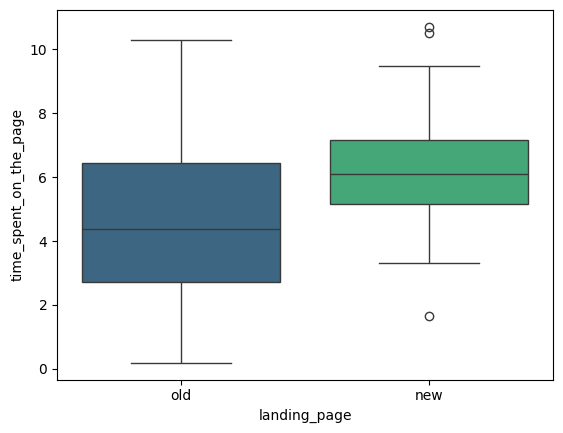

In [141]:
#Draw boxplot of landing_page and time_spent_on_the_page variable to see if there are any outliers
sns.boxplot(data=data,x = 'landing_page', y='time_spent_on_the_page',hue='landing_page', palette='viridis')
plt.show()

* Users are spending more time on new landing page compared to the users that are exposed to old landing page

**Let's check time_spent_on_the_page w.r.to converted**

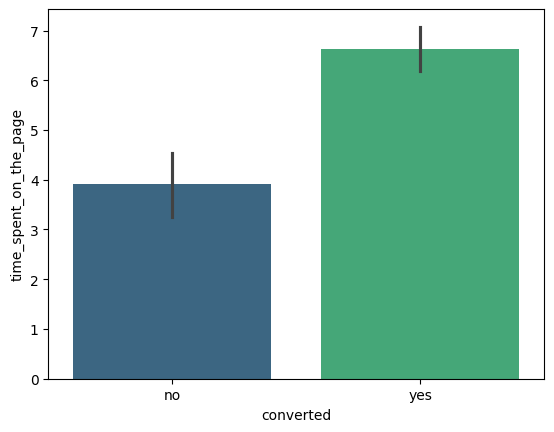

In [142]:
# Draw barplot to understand relation between conversion and the time spent on the page
sns.barplot(data = data, x = 'converted', y = 'time_spent_on_the_page', hue='converted', palette='viridis')
plt.show()

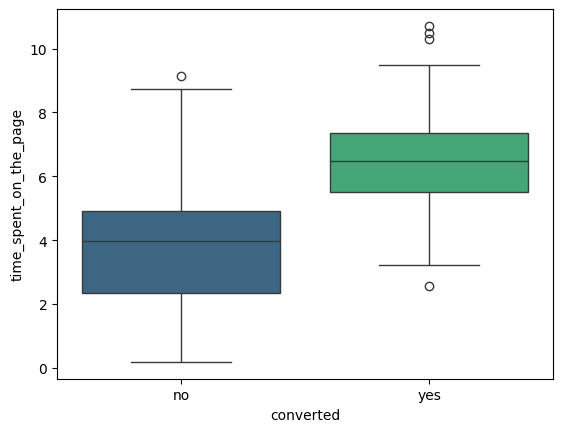

In [143]:
#Draw boxplot of converted and time_spent_on_the_page variable to see if there are any outliers
sns.boxplot(data=data,x = 'converted', y='time_spent_on_the_page',hue='converted', palette='viridis')
plt.show()

* Users that are converted are spending more time on the page than earlier 

**Let's check time_spent_on_the_page w.r.to language_preferred**

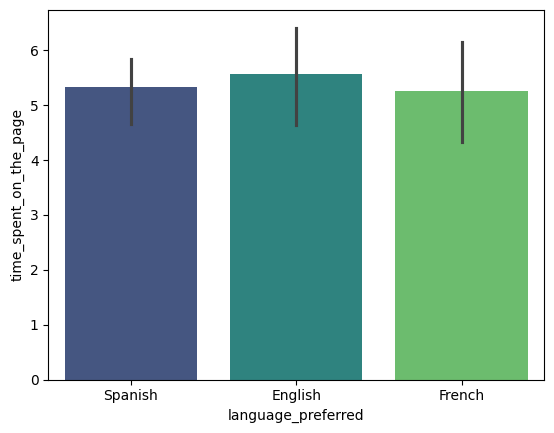

In [144]:
# Draw barplot to understand relation between language_preferred and the time spent on the page
sns.barplot(data = data, x = 'language_preferred', y = 'time_spent_on_the_page', hue='language_preferred', palette='viridis')
plt.show()

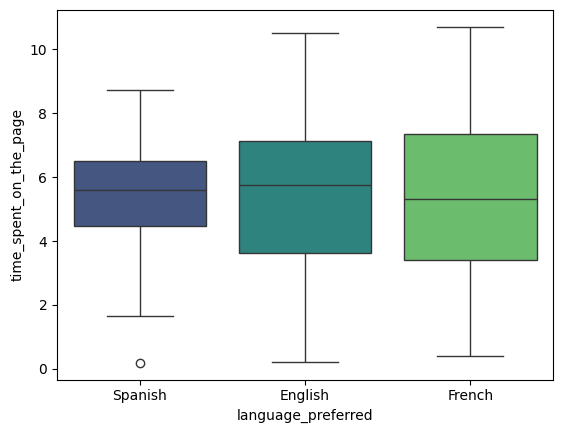

In [145]:
#Draw boxplot of language_preferred and time_spent_on_the_page variable to see if there are any outliers
sns.boxplot(data=data,x = 'language_preferred', y='time_spent_on_the_page',hue='language_preferred', palette='viridis')
plt.show()

* Users that are using Spanish are spending slightly lesser time on the page than other languages.

**Lets understand categorical plot for identifying behaviour of users**

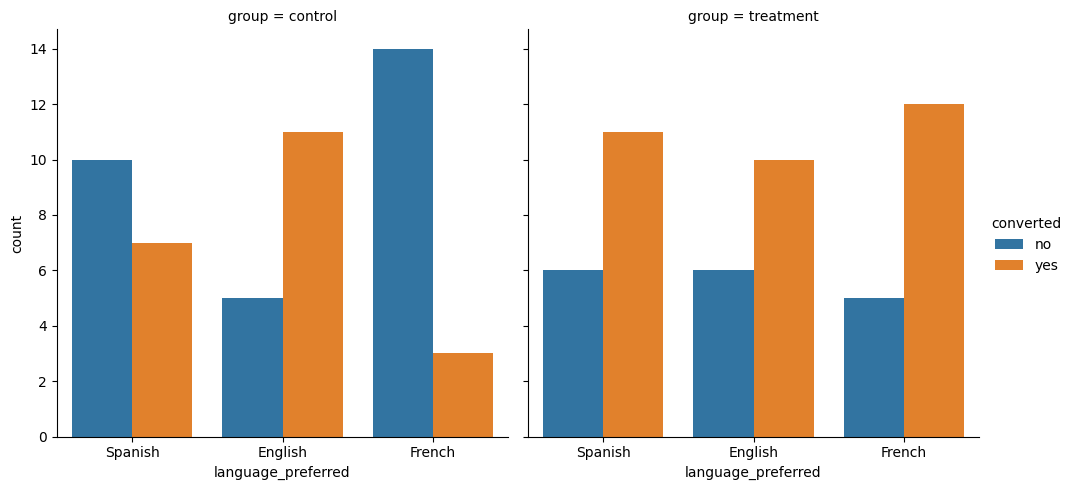

In [146]:
#Draw categorical plot between language_preferred, converted, group
sns.catplot(data = data, x = 'language_preferred', hue = 'converted', col = 'group', kind = 'count')
plt.show()

* In the control group, users who prefer French that are switched to the new landing page are very less.
However, in the treatment group, a higher number of French-preferred users have transitioned to the new landing page

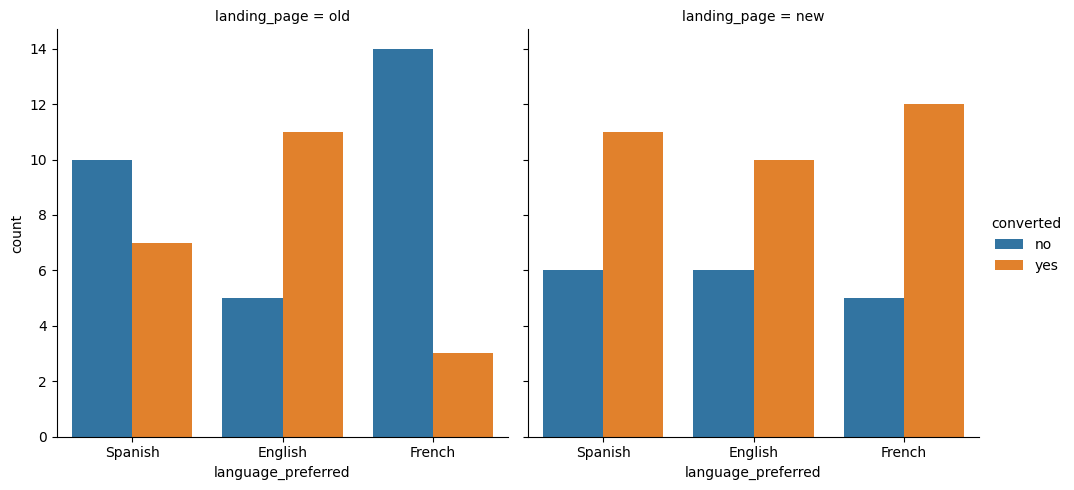

In [147]:
#Draw categorical plot between language_preferred, converted, landing_page
sns.catplot(data = data, x = 'language_preferred', hue = 'converted', col = 'landing_page', kind = 'count')
plt.show()

* Users of all languages have converted to new landing page, of them French seems to be having higher number in conversion

**Lets understand relation between numerical varaible -time_spent_on_the_page and categorical variables group,converted**


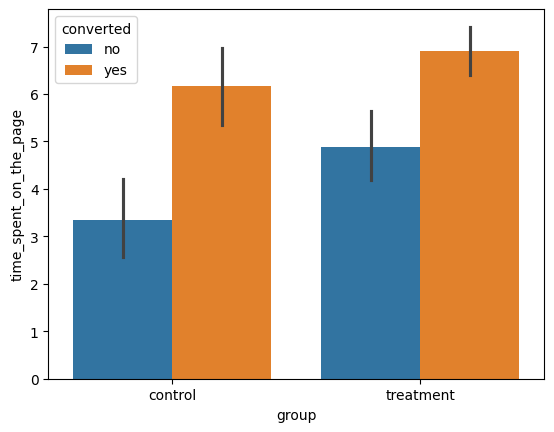

In [148]:
#Draw barplot for group, time_spent_on_the_page, converted
sns.barplot(data = data, x = 'group', y = 'time_spent_on_the_page', hue = 'converted');
plt.show()

* Users of group treatment have spent more time on the page and have high converted rate compated to contorl group

**Lets understand relation between numerical varaible -time_spent_on_the_page and categorical variables language_preferred,landing_page**

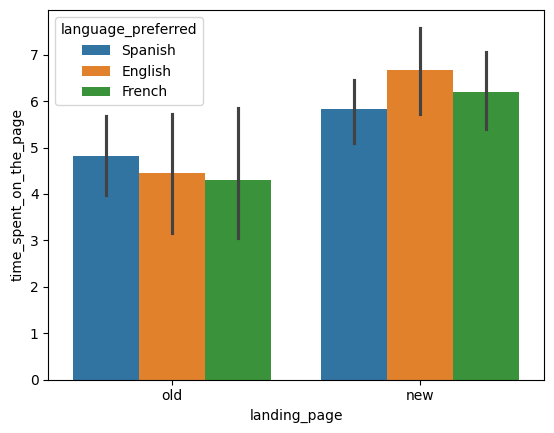

In [149]:
#Draw barplot for language_preferred, time_spent_on_the_page, landing_page
sns.barplot(data = data, x = 'landing_page', y = 'time_spent_on_the_page', hue = 'language_preferred');
plt.show()

* Users who preferred English are slightly high in number for new landing page 
* Users with all languages that spent more time on page are converted to new landing page

### Do the users spend more time on the new landing page than the old landing page?

**Perform Visual Analysis**

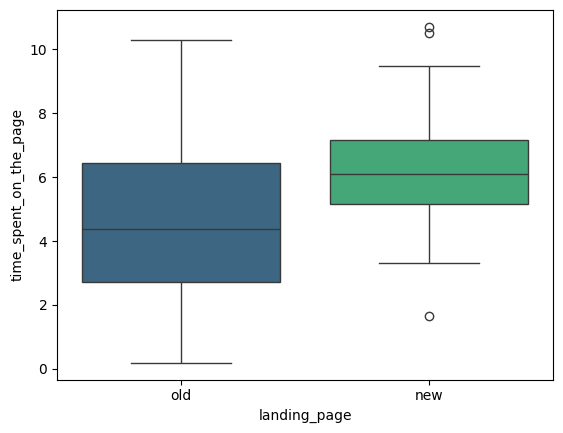

In [150]:
# Draw box plot to understand time spent on landing pages
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = data, hue='landing_page', palette='viridis')
plt.show()

* Users are spending more time on new landing page than older one

**Formulate null and alternative hypothesis**

Let $\mu_1, \mu_2$ be the mean time spent on new and old landing pages respectively

Null hypothesis

>$H_0:\mu_1=\mu_2$

Alternative hypothesis

>$H_a:\mu_1>\mu_2$

**Identifying test scenario**

This scenario involves a one-tailed two-sample mean test. Since the two samples are independent and the population standard deviations are unknown, the best test to use is the independent t-test.

**Calculate p value**

Use level of significance=0.05

In [151]:
time_spent_for_new_page = data[data['landing_page']=='new']['time_spent_on_the_page']
time_spent_for_old_page = data[data['landing_page']=='old']['time_spent_on_the_page']


In [152]:
#use data for new and old landing pages time spent and Calculate the t-statistic, p-value
from scipy import stats
t_stat, p_value = stats.ttest_ind(time_spent_for_new_page, time_spent_for_old_page,  alternative = 'greater')
p_value.round(6)

0.000132

**Inference based on p-value**

In [153]:
# Compare the level of significance with calculated p value
if p_value < 0.05:
    print("p Value is less than 0.05 - Reject the null hypothesis")
    print("We have enough statistical evidence to say that the users spend more time on new landing page compared to old landing page")
else:
    print("p Value is greater than 0.05 - Fail to reject the null hypothesis")
    print("We dont have enough statistical evidence to say that the users spend more time on new landing page compared to old landing page")

p Value is less than 0.05 - Reject the null hypothesis
We have enough statistical evidence to say that the users spend more time on new landing page compared to old landing page


* As the calculated p level is less than level of significance, we reject the null hypothesis and we have enough statistical evidence to mention that the users spend more time on new landing page compared to old landing page

### Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

**Perform Visual Analysis**

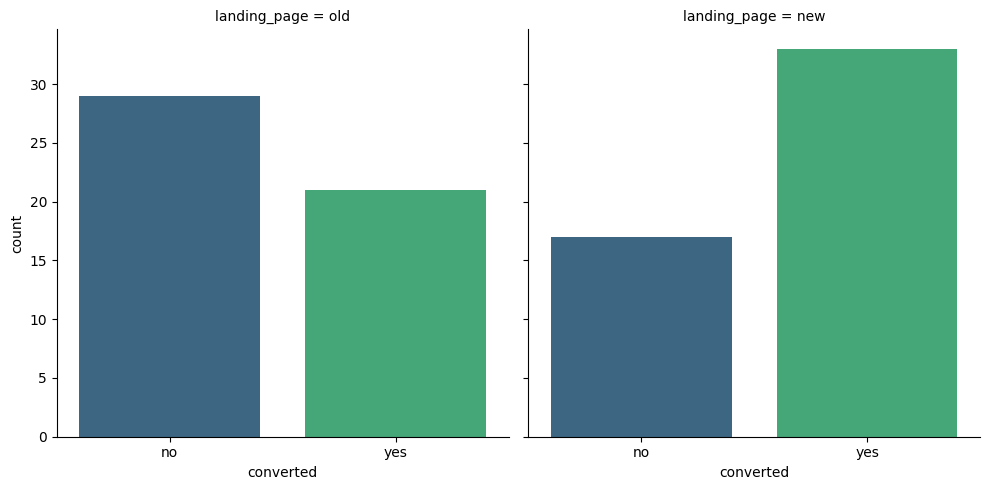

In [154]:
# Draw categorical plot to understand converted proportion on landing pages
sns.catplot(x = 'converted', col = 'landing_page', data = data,  kind = 'count', palette = 'viridis', hue='converted')
plt.show()

* Users that are using new landing page are likely to be converted than users who are using old landing page

**Formulate null and alternative hypothesis**

Let $p_1, p_2$ be the proportions of users in new landing page and old landing page respectively.

Null hypothesis

>$H_0:p_1=p_2$

Alternative hypothesis

>$H_a:p_1>p_2$

**Identifying test scenario**

This scenario involves a one-tailed two-population proportion test. Since the two populations are independent, the best test to use is two proportion z-test.

**Calculate p-value**

Use level of significance =0.05

In [155]:
#Total number of converted users
new_converted = len(data[(data['landing_page'] == 'new') & (data['converted'] == 'yes')])
old_converted = len(data[(data['landing_page'] == 'old') & (data['converted'] == 'yes')])
converted_size = np.array([new_converted, old_converted])

#Total number of samples that were given for users sampling
landing_page_new = len(data[data['landing_page'] == 'new'])
landing_page_old = len(data[data['landing_page'] == 'old'])

sample_size = np.array([landing_page_new, landing_page_old])


In [156]:
# Use calculated values and data above to determing z test for proportions
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest(converted_size , sample_size, alternative ='larger') 

p_value.round(6)

0.008026

**Inference based on p value**

In [157]:
# Compare the level of significance with calculated p value
if p_value < 0.05:
    print("calculated p Value is less than 0.05 - Reject the null hypothesis")
    print("We have enough statistical evidence to say that the conversion rate of the new page is greater than the conversion rate of the old page")
else:
    print("calculated p Value is greater than 0.05 - Fail to reject the null hypothesis")
    print("We dont have enough statistical evidence to say that the conversion rate of the new page is greater than the conversion rate of the old page")

calculated p Value is less than 0.05 - Reject the null hypothesis
We have enough statistical evidence to say that the conversion rate of the new page is greater than the conversion rate of the old page


* As the calculated p level is less than level of significance, we reject the null hypothesis and we have enough statistical evidence to mention that the conversion rate of the new page is greater than the conversion rate of the old page

### Does the converted status depend on the preferred language?

**Perform Visual Analysis**

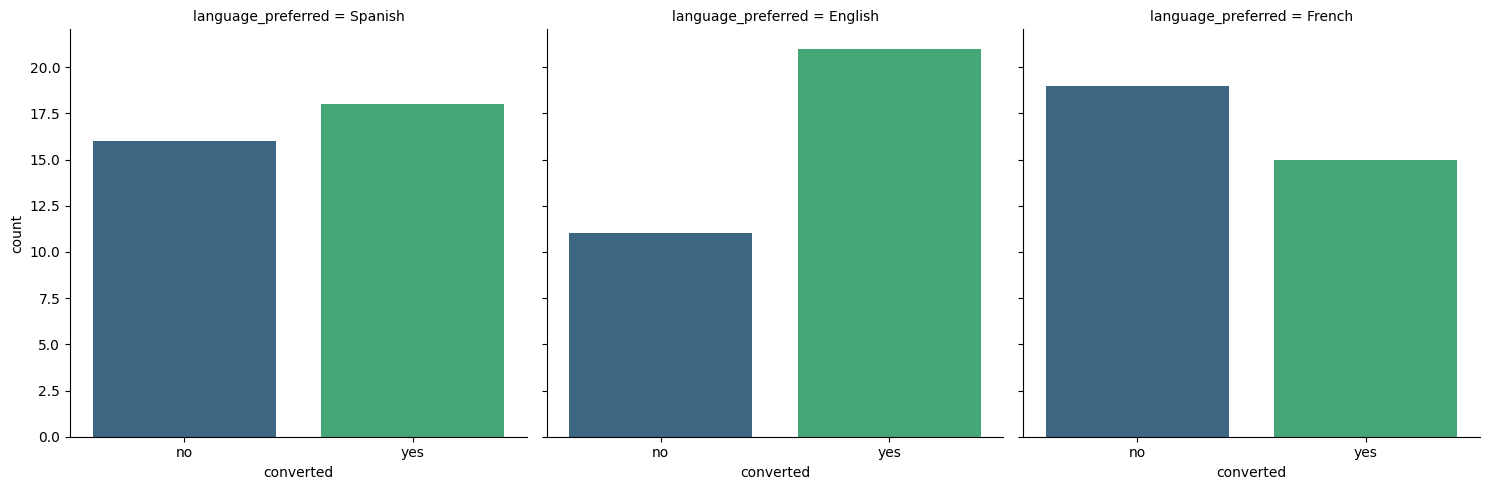

In [158]:
# Draw categorical plot to understand converted status w.r.to language_preferred
sns.catplot(x = 'converted', col = 'language_preferred', data = data,  kind = 'count', palette = 'viridis', hue='converted')
plt.show()

* language_preferred and converted are 2 categorical columns which seems to be independent of each other,though there is slightly higher side of converted for English compared to other languages

**Formulate null and alternative hypothesis**

Null hypothesis

>$H_0:$= Converted and language_preferred is independent of each other

Alternative hypothesis

>$H_a:$= Converted and language_preferred are dependent on each other

**Identifying test scenario**

* This scenario involves testing of independence of two categorical variables.Chi-square test of independence is the best test which helps to evaluate whether there is a significant association between two categorical variables.

**Calculate p-value**

Use level of significance = 0.05

In [159]:
# For chi-square test we need to create a contingency table for categorical columns
contingency_table = pd.crosstab(data['language_preferred'], data['converted'])
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


In [160]:
from scipy.stats import chi2_contingency
# Perform the Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
p_value.round(6)

0.212989

**Inference based on p value**

In [161]:
# Compare the level of significance with calculated p value
if p_value < 0.05:
    print("calculated p Value is less than 0.05 - Reject the null hypothesis")
    print("We have enough statistical evidence to say that the language_preferred  is dependent on converted data")
else:
    print("calculated p Value is greater than 0.05 - Fail to reject the null hypothesis")
    print("We dont have enough statistical evidence to say that the language_preferred is dependent on converted data")

calculated p Value is greater than 0.05 - Fail to reject the null hypothesis
We dont have enough statistical evidence to say that the language_preferred is dependent on converted data


* As the calculated p level is greater than level of significance, we reject the null hypothesis and this implies language_preferred and converted are independent of each other.

### Is the mean time spent on the new page same for the different language users?

**Perform Visual Analysis**

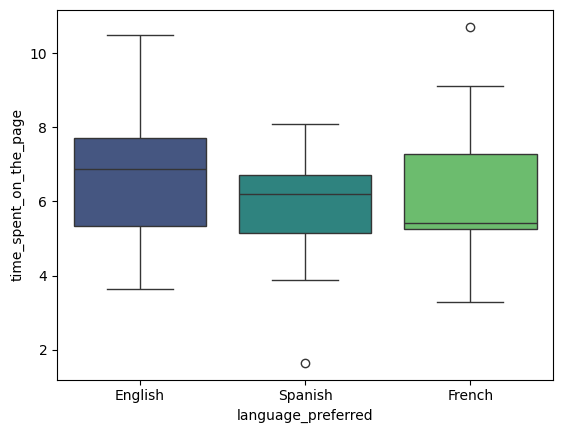

In [162]:
# Draw box plot to understand relation between language_preferred and time_spent_on_the_page after fetching dataset only for new landing page
data_new = data[data['landing_page']=='new']
sns.boxplot(x = 'language_preferred', data = data_new,  y='time_spent_on_the_page' , palette = 'viridis', hue = 'language_preferred')
plt.show()

In [163]:
#calculate mean
data_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

* Mean w.r.to time spent on the page for language preferred is almost same (rounding off to decimals)

**Formulate null and alternative hypothesis**

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new landing page for Spanish, English, French respectively

Null hypothesis

>$H_0:  \mu_1 = \mu_2 = \mu_3 $

Alternative hypothesis

>$H_a: $ Atleast one of the mean times spent on the new landing page is different from other.

**Identifying test scenario**

* To test whether the means of three or more populations are equal, generally Analysis of Variance (ANOVA) will be used. ANOVA assesses whether there are any statistically significant differences between the means of three or more independent (unrelated) groups. In this scenario, ANOVA test is suitable.

**Calculate p-value**

Use level of significance = 0.05

In [164]:
english_time_spent=data_new[data_new['language_preferred']=='English']['time_spent_on_the_page']
spanish_time_spent=data_new[data_new['language_preferred']=='Spanish']['time_spent_on_the_page']
french_time_spent=data_new[data_new['language_preferred']=='French']['time_spent_on_the_page']

In [165]:
from scipy.stats import f_oneway

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(english_time_spent, spanish_time_spent, french_time_spent)
p_value.round(6)

0.432041

**Inference based on p value**

In [166]:
# Compare the level of significance with calculated p value
if p_value < 0.05:
    print("calculated p Value is less than 0.05 - Reject the null hypothesis")
    print("We have enough statistical evidence to say that the average time spent on new landing page is not same for different language users")
else:
    print("calculated p Value is greater than 0.05 - Fail to reject the null hypothesis")
    print("We dont have enough statistical evidence to say that that the average time spent on new landing page is not same for different language users")

calculated p Value is greater than 0.05 - Fail to reject the null hypothesis
We dont have enough statistical evidence to say that that the average time spent on new landing page is not same for different language users


* As the calculated p level is greater than level of significance, we reject the null hypothesis and this implies average time spent on new landing page is almost same for different language users

### Conclusion

**Do the users spend more time on the new landing page than the old landing page?**
* To determine if users spend more time on the new landing page compared to the existing one, a two-sample independent t-test was conducted. The test yielded a p-value of 0.0001, which is less than the 5% significance level. Consequently, the null hypothesis is rejected. This implies that there is significant evidence to support the claim that users spend more time on the new landing page than on the old one.
  
**Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?**
* To determine if the conversion rate for the new landing page is higher than that of the old page, a two-proportion z-test was conducted. The test yielded a p-value of 0.008, which is less than the 5% significance level. Consequently, the null hypothesis is rejected. This implies that there is significant evidence to suggest that the conversion rate for the new landing page is higher than that for the old landing page.
  
**Does the converted status depend on the preferred language?**
* To determine if conversion status is dependent on preferred language or not, a chi-square test for independence was conducted. The test yielded a p-value of 0.2129, which is greater than the 5% significance level. Consequently, the null hypothesis is not rejected. This implies that there is no significant evidence to suggest that conversion status and the preferred language of the landing page are related; they appear to be independent of each other.
  
**Is the mean time spent on the new page same for the different language users?**
* To determine if the time spent on the new landing page is same for different language users, a one-way ANOVA test was conducted. The test yielded a p-value of 0.432, which is greater the 5% significance level. Consequently, the null hypothesis is not rejected. This implies that the mean time spent on the new landing page is relatively same for all language users.
